## Encontrar los mejores hiperparámetros para dos algoritmos predictivos

**Objetivo:** Seleccionar dos algoritmos de clasificación, optimizar sus hiperparámetros y entrenarlos.

In [1]:
pip install pandas numpy scikit-learn xgboost matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [6]:
df = pd.read_csv('dataset_preprocesado.csv')
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.dtypes)
print(X_train.head())

SeniorCitizen                              int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter

In [8]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Mejores hiperparámetros:', grid_search.best_params_)
print('Mejor F1-score (validación):', grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mejor F1-score (validación): 0.576282263706301


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



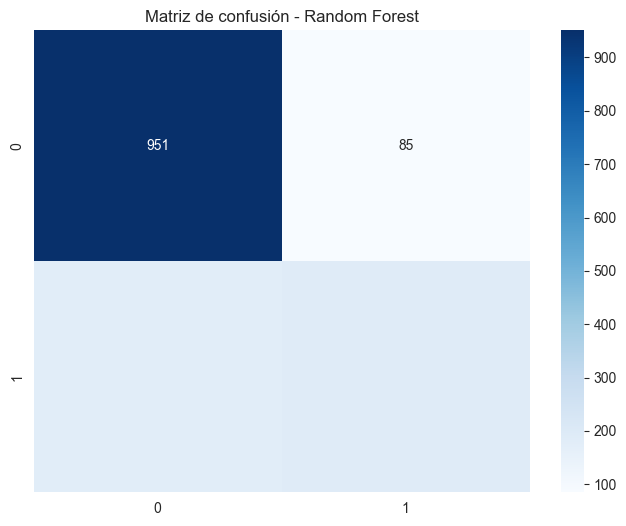

ROC-AUC: 0.8632


In [9]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión - Random Forest')
plt.show()
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print(f'ROC-AUC: {roc_auc:.4f}')

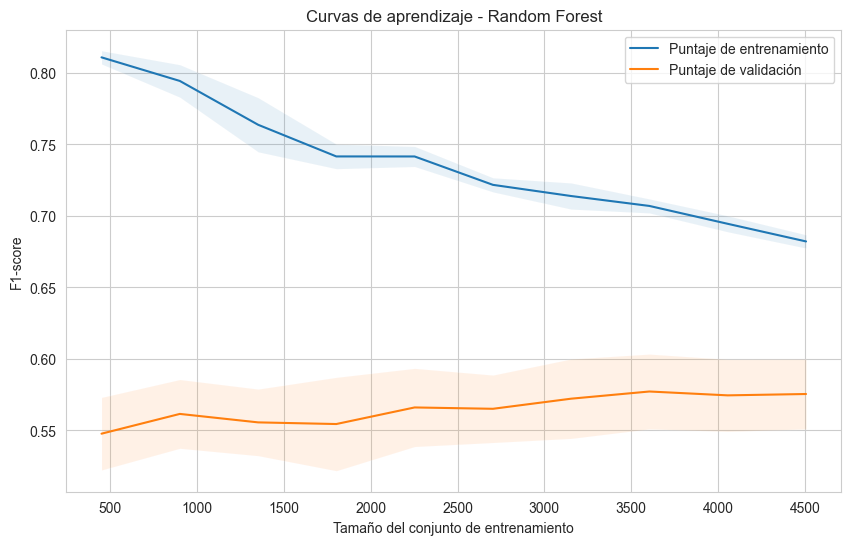

In [10]:
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Puntaje de entrenamiento')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Puntaje de validación')
plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1)
plt.fill_between(train_sizes, test_scores.mean(axis=1) - test_scores.std(axis=1),
                 test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.1)
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('F1-score')
plt.title('Curvas de aprendizaje - Random Forest')
plt.legend()
plt.show()